<h1 align="center">Basic Registration</h1>


**Summary:**

1. Creating an instance of the registration framework requires selection of the following components:
   * Optimizer.
   * Similarity metric.
   * Interpolator.
2. The registration framework only supports images with sitkFloat32 and sitkFloat64 pixel types (use the SimpleITK <a href="https://simpleitk.org/doxygen/latest/html/namespaceitk_1_1simple.html#af8c9d7cc96a299a05890e9c3db911885">Cast()</a> function if your image's pixel type is something else).

3. Successful registration is highly dependent on initialization. In general you can:
   * Use auxiliary information or user interaction to obtain an initial transformation (avoid resampling).
   * Center the images using the <a href="https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1CenteredTransformInitializerFilter.html">CenteredTransformInitializer</a>.
   * Coarsely sample the parameter space using the <a href="https://itk.org/Doxygen/html/classitk_1_1ExhaustiveOptimizerv4.html">Exhaustive Optimizer</a> to obtain one or more initial transformation estimates.
   * Manually initialize, via direct manipulation of transformation parameters and visualization or localization of corresponding points in the two images and then use the <a href="https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1LandmarkBasedTransformInitializerFilter.html">LandmarkBasedTransformInitializer</a>.

## Registration Components 

<img src="figures/ITKv4RegistrationComponentsDiagram.svg" style="width:700px"/><br><br>

There are many options for creating an instance of the registration framework, all of which are configured in SimpleITK via methods of the <a href="https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ImageRegistrationMethod.html">ImageRegistrationMethod</a> class. This class encapsulates many of the components available in ITK for constructing a registration instance.

Currently, the available choices from the following groups of ITK components are:

### Optimizers

The SimpleITK registration framework supports several optimizer types via the SetOptimizerAsX() methods, these include:

<ul>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1ExhaustiveOptimizerv4.html">Exhaustive</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1AmoebaOptimizerv4.html">Nelder-Mead downhill simplex</a>, a.k.a. Amoeba.
  </li>
  <li>
   <a href="https://itk.org/Doxygen/html/classitk_1_1PowellOptimizerv4.html">Powell optimizer</a>.
  </li>
  <li>
   <a href="https://itk.org/Doxygen/html/classitk_1_1OnePlusOneEvolutionaryOptimizerv4.html">1+1 evolutionary optimizer</a>.
  </li>
  <li>
  Variations on gradient descent:
  <ul>
    <li>
    <a href="http://www.itk.org/Doxygen/html/classitk_1_1GradientDescentOptimizerv4Template.html">GradientDescent</a>
    </li>
    <li>
    <a href="http://www.itk.org/Doxygen/html/classitk_1_1GradientDescentLineSearchOptimizerv4Template.html">GradientDescentLineSearch</a>
    </li>
    <li>
    <a href="http://www.itk.org/Doxygen/html/classitk_1_1RegularStepGradientDescentOptimizerv4.html">RegularStepGradientDescent</a>
    </li>
  </ul>
  </li>
  <li>
    <a href="http://www.itk.org/Doxygen/html/classitk_1_1ConjugateGradientLineSearchOptimizerv4Template.html">ConjugateGradientLineSearch</a> 
  </li>
  <li>
  <a href="https://itk.org/Doxygen/html/classitk_1_1LBFGS2Optimizerv4.html">L-BFGS2</a> (Limited memory Broyden,  Fletcher,Goldfarb,Shannon)
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1LBFGSBOptimizerv4.html">L-BFGS-B</a> (Limited memory Broyden,  Fletcher,Goldfarb,Shannon-Bound Constrained) - supports the use of simple constraints ($l\leq x \leq u$)  
  </li>
    
</ul>

 
### Similarity metrics

The SimpleITK registration framework supports several metric types via the SetMetricAsX() methods, these include:

<ul>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1MeanSquaresImageToImageMetricv4.html">MeanSquares</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1DemonsImageToImageMetricv4.html">Demons</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1CorrelationImageToImageMetricv4.html">Correlation</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1ANTSNeighborhoodCorrelationImageToImageMetricv4.html">ANTSNeighborhoodCorrelation</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1JointHistogramMutualInformationImageToImageMetricv4.html">JointHistogramMutualInformation</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1MattesMutualInformationImageToImageMetricv4.html">MattesMutualInformation</a>
  </li>
</ul>


### Interpolators

The SimpleITK registration framework supports several interpolators via the SetInterpolator() method, which receives one of
the <a href="https://simpleitk.org/doxygen/latest/html/namespaceitk_1_1simple.html#a7cb1ef8bd02c669c02ea2f9f5aa374e5">following enumerations</a>:
<ul>
<li> sitkNearestNeighbor </li>
<li> sitkLinear </li>
<li> sitkBSpline </li>
<li> sitkGaussian </li>
<li> sitkHammingWindowedSinc </li>
<li> sitkCosineWindowedSinc </li>
<li> sitkWelchWindowedSinc </li>
<li> sitkLanczosWindowedSinc </li>
<li> sitkBlackmanWindowedSinc </li>
</ul>

In [3]:
# You must put %matplotlib widget in the very beginning of the jupyterlab
%matplotlib widget

import SimpleITK as sitk
from downloaddata import fetch_data as fdata

import gui

import registration_gui as rgui

import numpy as np
import os

OUTPUT_DIR = "output"

## Read images

We first read the images, specifying the pixel type that is required for registration (Float32 or Float64) and look at them. In this notebook we use a CT and MR image from the same patient. These are part of the training data from the Retrospective Image Registration Evaluation (<a href="https://rire.insight-journal.org/">RIRE</a>) project.

Fetching training_001_ct.mha
Fetching training_001_mr_T1.mha


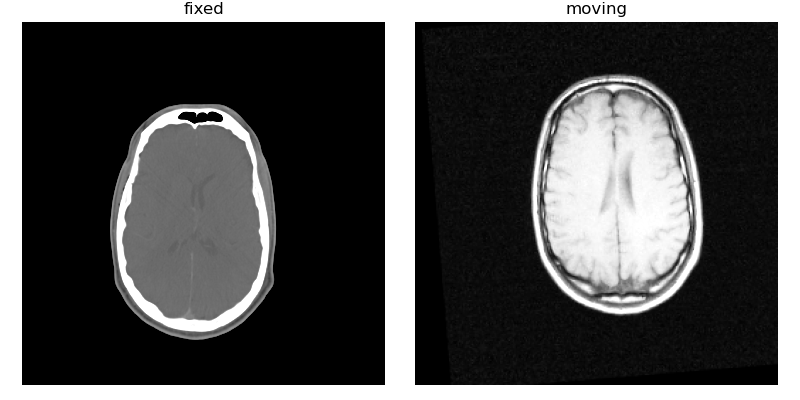

In [4]:
fixed_image = sitk.ReadImage(fdata("training_001_ct.mha"), sitk.sitkFloat32)
moving_image = sitk.ReadImage(fdata("training_001_mr_T1.mha"), sitk.sitkFloat32)

ct_window_level = [835, 162]
mr_window_level = [1036, 520]
gui.MultiImageDisplay(
    image_list=[fixed_image, moving_image],
    title_list=["fixed", "moving"],
    figure_size=(8, 4),
    window_level_list=[ct_window_level, mr_window_level],
);

## Classic Registration

Estimate a 3D rigid transformation between images of different modalities. 

We have made the following choices with respect to initialization and registration component settings:

<ul>

<li>Similarity metric, mutual information (Mattes MI):
<ul>
  <li>Number of histogram bins, 50.</li>
  <li>Sampling strategy, random.</li>
  <li>Sampling percentage, 1%.</li>
</ul>
</li>
<li>Interpolator, sitkLinear.</li>
<li>Optimizer, gradient descent: 
<ul>
  <li>Learning rate, step size along traversal direction in parameter space, 1.0 .</li>
  <li>Number of iterations, maximal number of iterations, 100.</li>
  <li>Convergence minimum value, value used for convergence checking in conjunction with the energy profile of the similarity metric that is estimated in the given window size, 1e-6.</li>
  <li>Convergence window size, number of values of the similarity metric which are used to estimate the energy profile of the similarity metric, 10.</li>
</ul>
</li>
</ul>

We initialize registration by aligning the centers of the two volumes. To qualitatively evaluate the result we use a linked cursor approach, click on one image and the corresponding point is added to the other image.

In [ ]:
initial_transform = sitk.CenteredTransformInitializer(
    fixed_image,
    moving_image,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY,
)

gui.RegistrationPointDataAquisition(
    fixed_image,
    moving_image,
    figure_size=(8, 4),
    known_transformation=initial_transform,
    fixed_window_level=ct_window_level,
    moving_window_level=mr_window_level,
);

Run the next cell three times:
1. As is.
2. Uncomment the automated optimizer scale setting so that a change in rotation (radians) has a similar effect to a change in translation (mm).
3. Uncomment the multi-resolution settings.

In [ ]:
registration_method = sitk.ImageRegistrationMethod()

# Similarity metric settings.
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings.
registration_method.SetOptimizerAsGradientDescent(
    learningRate=1.0,
    numberOfIterations=100,
    convergenceMinimumValue=1e-6,
    convergenceWindowSize=10,
)
# registration_method.SetOptimizerScalesFromPhysicalShift()

# Setup for the multi-resolution framework.
# registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
# registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])
# registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Don't optimize in-place, we would possibly like to run this cell multiple times.
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# Connect all of the observers so that we can perform plotting during registration.
registration_method.AddCommand(sitk.sitkStartEvent, rgui.start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, rgui.end_plot)
registration_method.AddCommand(
    sitk.sitkMultiResolutionIterationEvent, rgui.update_multires_iterations
)
registration_method.AddCommand(
    sitk.sitkIterationEvent, lambda: rgui.plot_values(registration_method)
)

final_transform = registration_method.Execute(fixed_image, moving_image)

# Always check the reason optimization terminated.
print("Final metric value: {0}".format(registration_method.GetMetricValue()))
print(
    "Optimizer's stopping condition, {0}".format(
        registration_method.GetOptimizerStopConditionDescription()
    )
)

Qualitatively evaluate the result using a linked cursor approach (visual evaluation):

In [ ]:
gui.RegistrationPointDataAquisition(
    fixed_image,
    moving_image,
    figure_size=(8, 4),
    known_transformation=final_transform,
    fixed_window_level=ct_window_level,
    moving_window_level=mr_window_level,
);

If we are satisfied with the results, save them to file.

In [ ]:
moving_resampled = sitk.Resample(
    moving_image,
    fixed_image,
    final_transform,
    sitk.sitkLinear,
    0.0,
    moving_image.GetPixelID(),
)
sitk.WriteImage(
    moving_resampled, os.path.join(OUTPUT_DIR, "RIRE_training_001_mr_T1_resampled.mha")
)
sitk.WriteTransform(
    final_transform, os.path.join(OUTPUT_DIR, "RIRE_training_001_CT_2_mr_T1.tfm")
)

## ITKv4 Coordinate Systems

Unlike the classical registration approach where the fixed and moving images are treated differently, the ITKv4 registration framework allows you to treat both images in the same manner. This is achieved by introducing a third coordinate system, the virtual image domain.

<img src="figures/registrationFrameworkTransformations.svg"/><br><br>

Thus, the ITK v4 registration framework deals with three transformations:
<ul>
<li>
SetInitialTransform, $T_{opt}$ - composed with the moving initial transform, maps points from the virtual image domain to the moving image domain, modified during optimization. 
</li>
<li>
SetFixedInitialTransform $T_f$- maps points from the virtual image domain to the fixed image domain, never modified.
</li>
<li>
SetMovingInitialTransform $T_m$- maps points from the virtual image domain to the moving image domain, never modified.
</li>
</ul>

The transformation that maps points from the fixed to moving image domains is thus: $^M\mathbf{p}  = T_{opt}(T_m(T_f^{-1}(^F\mathbf{p})))$

We now modify the previous example to use $T_{opt}$ and $T_m$.

In [ ]:
registration_method = sitk.ImageRegistrationMethod()

# Similarity metric settings.
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings.
registration_method.SetOptimizerAsGradientDescent(
    learningRate=1.0,
    numberOfIterations=100,
    convergenceMinimumValue=1e-6,
    convergenceWindowSize=10,
)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Setup for the multi-resolution framework.
registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[4, 2, 1])
registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2, 1, 0])
registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Set the initial moving and optimized transforms.
optimized_transform = sitk.Euler3DTransform()
registration_method.SetMovingInitialTransform(initial_transform)
registration_method.SetInitialTransform(optimized_transform, inPlace=False)

# Connect all of the observers so that we can perform plotting during registration.
registration_method.AddCommand(sitk.sitkStartEvent, rgui.start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, rgui.end_plot)
registration_method.AddCommand(
    sitk.sitkMultiResolutionIterationEvent, rgui.update_multires_iterations
)
registration_method.AddCommand(
    sitk.sitkIterationEvent, lambda: rgui.plot_values(registration_method)
)

# Need to compose the transformations after registration.
final_transform_v4 = sitk.CompositeTransform(
    [registration_method.Execute(fixed_image, moving_image), initial_transform]
)

# Always check the reason optimization terminated.
print("Final metric value: {0}".format(registration_method.GetMetricValue()))
print(
    "Optimizer's stopping condition, {0}".format(
        registration_method.GetOptimizerStopConditionDescription()
    )
)

In [ ]:
gui.RegistrationPointDataAquisition(
    fixed_image,
    moving_image,
    figure_size=(8, 4),
    known_transformation=final_transform_v4,
    fixed_window_level=ct_window_level,
    moving_window_level=mr_window_level,
);

## Initialization

Initialization effects both the runtime and convergence to the correct minimum. Ideally our transformation is initialized close to the correct solution ensuring convergence in a timely manner. Problem specific initialization will often yield better results than the more generic solutions we show below. As a rule of thumb, use as much prior information (external to the image content) as you can to initialize your registration task.

Common initializations in the generic setting:
1. Do nothing (a.k.a. hope/unique setting) - initialize using the identity transformation.
2. CenteredTransformInitializer (GEOMETRY or MOMENTS) - translation based initialization, align the centers of the images or their centers of mass (intensity based).
3. Use the exhaustive optimizer as a first step - never underestimate brute force.
4. Manual initialization - allow an operator to control parameter settings using a GUI with visual feedback or identify multiple corresponding points in the two images. 


We start by loading our data, CT and MR scans of the CIRS (Norfolk, VA, USA) abdominal phantom.

In [ ]:
data_directory = os.path.dirname(fdata("CIRS057A_MR_CT_DICOM/readme.txt"))

ct_window_level = [1727, -320]
mr_window_level = [355, 178]

fixed_series_ID = "1.2.840.113619.2.290.3.3233817346.783.1399004564.515"
moving_series_ID = "1.3.12.2.1107.5.2.18.41548.30000014030519285935000000933"

fixed_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(
    data_directory, fixed_series_ID
)
moving_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(
    data_directory, moving_series_ID
)

fixed_image = sitk.ReadImage(fixed_series_filenames, sitk.sitkFloat32)
moving_image = sitk.ReadImage(moving_series_filenames, sitk.sitkFloat32)

### Identity transform initialization

In [ ]:
initial_transform = sitk.Transform()
gui.RegistrationPointDataAquisition(
    fixed_image,
    moving_image,
    figure_size=(8, 4),
    known_transformation=initial_transform,
    fixed_window_level=ct_window_level,
    moving_window_level=mr_window_level,
);

When working with clinical images, the DICOM tags define the orientation and position of the anatomy in the volume. The tags of interest are:
<ul>
  <li> (0020|0032) Image Position (Patient) : coordinates of the the first transmitted voxel. </li>
  <li>(0020|0037) Image Orientation (Patient): directions of first row and column in 3D space. </li>
  <li>(0018|5100) Patient Position: Patient placement on the table 
  <ul>
  <li> Head First Prone (HFP)</li>
  <li> Head First Supine (HFS)</li>
  <li> Head First Decubitus Right (HFDR)</li>
  <li> Head First Decubitus Left (HFDL)</li>
  <li> Feet First Prone (FFP)</li>
  <li> Feet First Supine (FFS)</li>
  <li> Feet First Decubitus Right (FFDR)</li>
  <li> Feet First Decubitus Left (FFDL)</li>
  </ul>
  </li>
</ul>

SimpleITK/ITK takes this information into account when loading DICOM images. 

But we are working with DICOM images, so why aren't the images oriented correctly using the identity transformation?

Well, the patient position in the scanner is manually entered by the technician meaning that errors may occur, though rarely. For our data, a phantom, it is unclear which side is the "head" and which is the "feet" so the technicians entered reasonable values for each scan. 

In [ ]:
reader = sitk.ImageFileReader()
reader.SetFileName(fixed_series_filenames[0])
reader.ReadImageInformation()
print(
    "Patient name: "
    + reader.GetMetaData("0010|0010")
    + ", Patient position:"
    + reader.GetMetaData("0018|5100")
)
reader.SetFileName(moving_series_filenames[0])
reader.ReadImageInformation()
print(
    "Patient name: "
    + reader.GetMetaData("0010|0010")
    + ", Patient position:"
    + reader.GetMetaData("0018|5100")
)

### CenteredTransformInitializer initialization 
Compare GEOMETRY and MOMENTS based approaches:

In [ ]:
initial_transform = sitk.CenteredTransformInitializer(
    fixed_image,
    moving_image,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY,
)
gui.RegistrationPointDataAquisition(
    fixed_image,
    moving_image,
    figure_size=(8, 4),
    known_transformation=initial_transform,
    fixed_window_level=ct_window_level,
    moving_window_level=mr_window_level,
);

### Exhaustive optimizer initialization

The following initialization approach is a combination of using prior knowledge and the exhaustive optimizer. We know that the scans are acquired with the "patient" either supine (on their back) or prone (on their stomach) and that the scan direction (head-to-feet or feet-to-head) is along the images' z axis. 
We use the CenteredTransformInitializer to initialize the translation and the exhaustive optimizer to obtain an initial rigid transformation.

The exhaustive optimizer evaluates the similarity metric on a grid in parameter space centered on the parameters of the initial transform. This grid is defined using three elements:
1. numberOfSteps.
2. stepLength.
3. optimizer scales.

The similarity metric is evaluated on the resulting parameter grid:
initial_parameters &plusmn; numberOfSteps &times; stepLength &times; optimizerScales

***Example***:
1. numberOfSteps=[1,0,2,0,0,0]
2. stepLength = np.pi
3. optimizer scales = [1,1,0.5,1,1,1]

Will perform 15 metric evaluations ($\displaystyle\prod_i (2*numberOfSteps[i] + 1)$).

The parameter values for the second parameter and the last three parameters are the initial parameter values. The parameter values for the first parameter are $v_{init}-\pi, v_{init}, v_{init}+\pi$ and the parameter values for the third parameter are $v_{init}-\pi, v_{init}-\pi/2, v_{init}, v_{init}+\pi/2, v_{init}+\pi$.

The transformation corresponding to the lowest similarity metric is returned.

In [ ]:
initial_transform = sitk.CenteredTransformInitializer(
    fixed_image,
    moving_image,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.MOMENTS,
)
registration_method = sitk.ImageRegistrationMethod()
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)
registration_method.SetInterpolator(sitk.sitkLinear)
# The order of parameters for the Euler3DTransform is [angle_x, angle_y, angle_z, t_x, t_y, t_z]. The parameter
# sampling grid is centered on the initial_transform parameter values, that are all zero for the rotations. Given
# the number of steps, their length and optimizer scales we have:
# angle_x = 0
# angle_y = -pi, 0, pi
# angle_z = -pi, 0, pi
registration_method.SetOptimizerAsExhaustive(
    numberOfSteps=[0, 1, 1, 0, 0, 0], stepLength=np.pi
)
registration_method.SetOptimizerScales([1, 1, 1, 1, 1, 1])

# Perform the registration in-place so that the initial_transform is modified.
registration_method.SetInitialTransform(initial_transform, inPlace=True)
registration_method.Execute(fixed_image, moving_image)

gui.RegistrationPointDataAquisition(
    fixed_image,
    moving_image,
    figure_size=(8, 4),
    known_transformation=initial_transform,
    fixed_window_level=ct_window_level,
    moving_window_level=mr_window_level,
);

#### Manual initialization

When all else fails, a human in the loop will almost always be able to robustly initialize the registration.

In the example below we identify corresponding points to compute an initial rigid transformation. 

**Note**: There is no correspondence between the fiducial markers on the phantom.

In [ ]:
point_acquisition_interface = gui.RegistrationPointDataAquisition(
    fixed_image,
    moving_image,
    figure_size=(8, 4),
    fixed_window_level=ct_window_level,
    moving_window_level=mr_window_level,
);

In [ ]:
# Get the manually specified points and compute the transformation.

fixed_image_points, moving_image_points = point_acquisition_interface.get_points()

# Previously localized points (here so that the testing passes):
fixed_image_points = [
    (24.062587103074605, 14.594981536981521, -58.75),
    (6.178716135332678, 53.93949766601378, -58.75),
    (74.14383149714774, -69.04462737237648, -76.25),
    (109.74899278747029, -14.905272533666817, -76.25),
]
moving_image_points = [
    (4.358707846364581, 60.46357110706131, -71.53120422363281),
    (24.09010295252645, 98.21840981673873, -71.53120422363281),
    (-52.11888008581127, -26.57984635768439, -58.53120422363281),
    (-87.46150681392184, 28.73904765153219, -58.53120422363281),
]

fixed_image_points_flat = [c for p in fixed_image_points for c in p]
moving_image_points_flat = [c for p in moving_image_points for c in p]
initial_transformation = sitk.LandmarkBasedTransformInitializer(
    sitk.VersorRigid3DTransform(), fixed_image_points_flat, moving_image_points_flat
)
gui.RegistrationPointDataAquisition(
    fixed_image,
    moving_image,
    figure_size=(8, 4),
    known_transformation=initial_transform,
    fixed_window_level=ct_window_level,
    moving_window_level=mr_window_level,
);

<a href="06_advanced_registration.ipynb"><h2 align=right>Next &raquo;</h2></a>